In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
from matplotlib import pyplot as plt

In [3]:
# Create a file path
alzheimers_data = Path("Resources/alzheimers_prediction_dataset.csv")

# Read the Data
alzheimers_df = pd.read_csv(alzheimers_data)
alzheimers_df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [4]:
alzheimers_df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

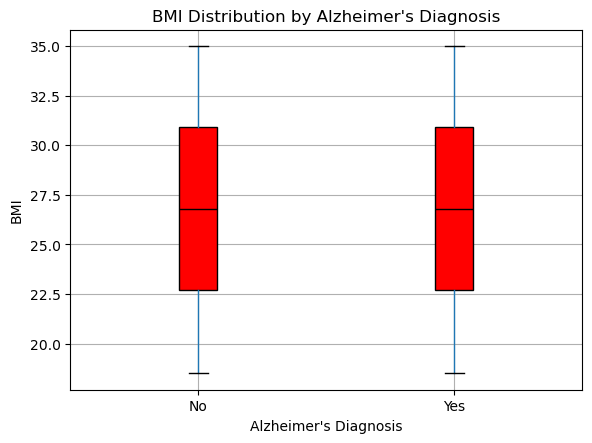

In [15]:
# BMI Distribution by Alzheimer's Diagnosis
plt.figure(figsize=(10,5))
alzheimers_df.boxplot(column='BMI', by="Alzheimer’s Diagnosis", patch_artist=True,
                      boxprops={'facecolor': 'red'}, medianprops={'color': 'black'})
plt.xlabel("Alzheimer's Diagnosis")
plt.ylabel("BMI")
plt.title("BMI Distribution by Alzheimer's Diagnosis")
plt.suptitle("")
plt.show()


In [21]:
# T-test for BMI Differences
alzheimers_bmi = alzheimers_df[alzheimers_df["Alzheimer’s Diagnosis"] == "Yes"]["BMI"]
non_alzheimers_bmi = alzheimers_df[alzheimers_df["Alzheimer’s Diagnosis"] == "No"]["BMI"]
t_stat, p_value_bmi = ttest_ind(alzheimers_bmi, non_alzheimers_bmi, equal_var=False)

# Print results
print("T-test for BMI and Alzheimer's Diagnosis")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value_bmi:.4f}")

T-test for BMI and Alzheimer's Diagnosis
T-statistic: -0.4641, P-value: 0.6426


<Figure size 800x500 with 0 Axes>

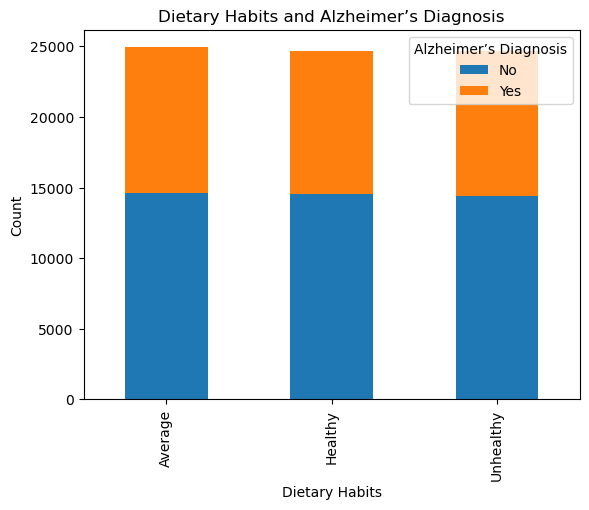

In [22]:
# Dietary Habits vs. Alzheimer's Diagnosis
plt.figure(figsize=(8,5))
dietary_counts = alzheimers_df.groupby(["Dietary Habits", "Alzheimer’s Diagnosis"]).size().unstack()
dietary_counts.plot(kind='bar', stacked=True)
plt.xlabel("Dietary Habits")
plt.ylabel("Count")
plt.title("Dietary Habits and Alzheimer’s Diagnosis")
plt.legend(title="Alzheimer’s Diagnosis", labels=['No', 'Yes'])
plt.show()



In [23]:
# Chi-square test for Dietary Habits
dietary_crosstab = pd.crosstab(alzheimers_df["Dietary Habits"], alzheimers_df["Alzheimer’s Diagnosis"])
chi2_stat, p_value_diet, _, _ = chi2_contingency(dietary_crosstab)

# Print Results
print("Chi-square test for Dietary Habits and Alzheimer's Diagnosis")
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value_diet:.4f}")

Chi-square test for Dietary Habits and Alzheimer's Diagnosis
Chi-square statistic: 1.5262348697219739, P-value: 0.4662


In [25]:
#Conclusion
if p_value_bmi < 0.05:
    print("BMI has a significant impact on Alzheimer's diagnosis.")
else:
    print("BMI does NOT have a significant impact on Alzheimer's diagnosis.")

if p_value_diet < 0.05:
    print("Dietary habits have a significant relationship with Alzheimer's diagnosis.")
else:
    print("Dietary habits do NOT have a significant relationship with Alzheimer's diagnosis.")

BMI does NOT have a significant impact on Alzheimer's diagnosis.
Dietary habits do NOT have a significant relationship with Alzheimer's diagnosis.
